In [1]:
import numpy as np
import cv2

from skimage.transform import rescale

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches

%matplotlib inline

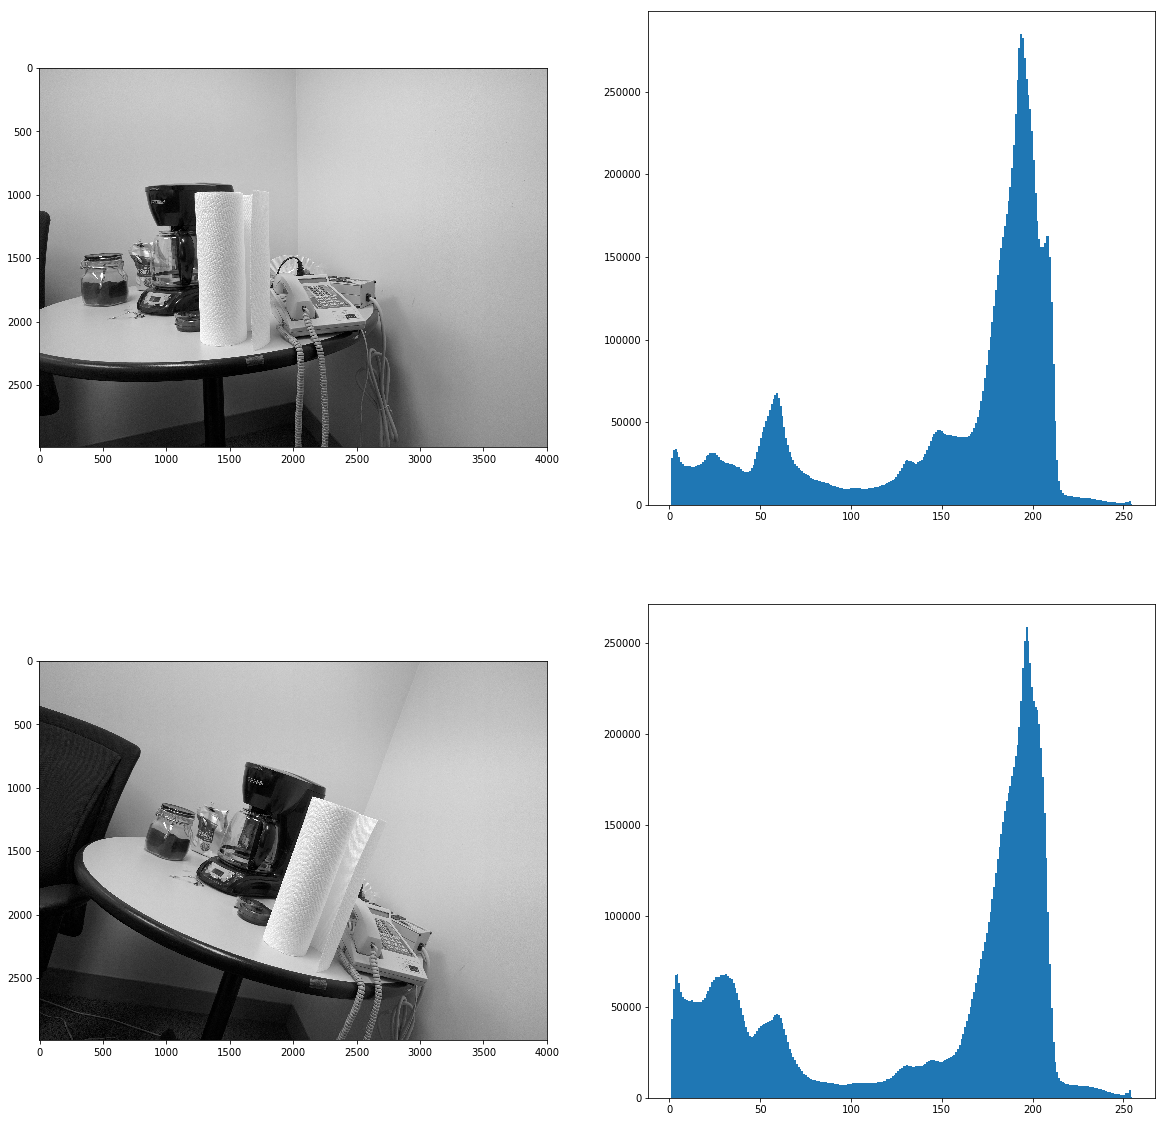

In [2]:
samples = ['../samples/office1.jpg', 
           '../samples/office_rotated.jpg'
           ]

img0 = mpimg.imread(samples[0])
imgRot = mpimg.imread(samples[1])

img0 = cv2.cvtColor(img0, cv2.COLOR_RGB2GRAY)
imgRot = cv2.cvtColor(imgRot, cv2.COLOR_RGB2GRAY)

f, ax = plt.subplots(2, 2, figsize=(20,20))
ax[0, 0].imshow(img0, cmap='gray')
ax[0, 1].hist(img0.ravel(), 255, [1, 255])
ax[1, 0].imshow(imgRot, cmap='gray')
ax[1, 1].hist(imgRot.ravel(), 255, [1, 255])

plt.show()

In [9]:
def preProcess(image, rs=0.3):
    return rescale(image, rs, mode='reflect')

def computeRotation(img0, img1):
    sz = img0.shape
    warp_mode = cv2.MOTION_EUCLIDEAN

    warp_matrix = np.eye(2, 3, dtype=np.float32)

    number_of_iterations = 5000
    termination_eps = 1e-10

    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)

    # Run the ECC algorithm. The results are stored in warp_matrix.
    (cc, warp_matrix) = cv2.findTransformECC (img0, img1, warp_matrix, warp_mode, criteria)

    return warp_matrix

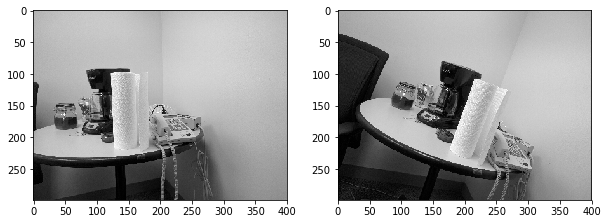

In [6]:
img0post = preProcess(img0, 0.1)
imgRotpost = preProcess(imgRot, 0.1)

f, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img0post, cmap='gray')
ax[1].imshow(imgRotpost, cmap='gray')

plt.show()

-21.6053346373


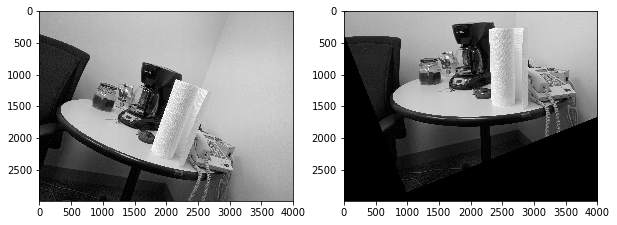

In [12]:
img0post = img0post.astype(np.float32)
imgRotpost = imgRotpost.astype(np.float32)

warp_matrix = computeRotation(img0post, imgRotpost)

sin = warp_matrix[0, 1]
cos = warp_matrix[0, 0]
    
degs = np.arctan2(sin, cos) * 180.0 / np.pi

print (degs)


imgAligned = cv2.warpAffine(imgRot, warp_matrix, (imgRot.shape[1], imgRot.shape[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)

f, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(imgRot, cmap='gray')
ax[1].imshow(imgAligned, cmap='gray')

plt.show()
